[View in Colaboratory](https://colab.research.google.com/github/battlerhythm/tensorflow/blob/master/6.3%20matplotlib.ipynb)

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [0]:
# 배치정규화(Batch Normalization)
# 이 기법은 과적합을 막아줄 뿐 아니라 학습 속도도 향상시켜주는 장점이 있습니다.
# tf.nn.batch_normalization과 tf.layers.batch_normalization함수로 쉽게 적용할 수 있습니다.

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
b1 = tf.Variable(tf.zeros([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
L1 = tf.layers.batch_normalization(L1, training=True)

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
b2 = tf.Variable(tf.zeros([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
L2 = tf.layers.batch_normalization(L2, training=True)

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
b3 = tf.Variable(tf.zeros([10]))
model = tf.matmul(L2, W3) + b3

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)
# optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
# train_op = optimizer.minimize(cost)

In [7]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 학습데이터 전체를 한 바퀴 도는 것을 에포크(epoch)라고합니다.
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(30):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys})
        total_cost += cost_val
        
        
    print('Epoch:', '%04d' % (epoch + 1), 'Avg. cost = ' '{:.3f}'.format(total_cost / total_batch))
    
print('최적화 완료')

is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

print('정확도:', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

Epoch: 0001 Avg. cost = 0.198
Epoch: 0002 Avg. cost = 0.086
Epoch: 0003 Avg. cost = 0.063
Epoch: 0004 Avg. cost = 0.046
Epoch: 0005 Avg. cost = 0.038
Epoch: 0006 Avg. cost = 0.034
Epoch: 0007 Avg. cost = 0.027
Epoch: 0008 Avg. cost = 0.024
Epoch: 0009 Avg. cost = 0.024
Epoch: 0010 Avg. cost = 0.020
Epoch: 0011 Avg. cost = 0.016
Epoch: 0012 Avg. cost = 0.015
Epoch: 0013 Avg. cost = 0.017
Epoch: 0014 Avg. cost = 0.016
Epoch: 0015 Avg. cost = 0.011
Epoch: 0016 Avg. cost = 0.013
Epoch: 0017 Avg. cost = 0.013
Epoch: 0018 Avg. cost = 0.012
Epoch: 0019 Avg. cost = 0.010
Epoch: 0020 Avg. cost = 0.010
Epoch: 0021 Avg. cost = 0.008
Epoch: 0022 Avg. cost = 0.010
Epoch: 0023 Avg. cost = 0.009
Epoch: 0024 Avg. cost = 0.009
Epoch: 0025 Avg. cost = 0.008
Epoch: 0026 Avg. cost = 0.010
Epoch: 0027 Avg. cost = 0.008
Epoch: 0028 Avg. cost = 0.006
Epoch: 0029 Avg. cost = 0.008
Epoch: 0030 Avg. cost = 0.005
최적화 완료
정확도: 0.9811


[[ -4.2216115    0.62925786  -0.16966198 ...  17.113161    -4.323314
    2.4512815 ]
 [  2.6626978    9.585197    30.514048   ...   1.0267733  -11.387364
  -19.795773  ]
 [ -2.2794383   23.53069     -4.9613304  ...   0.14613022  -2.227444
   -7.727265  ]
 ...
 [ -2.5667603    2.2755165  -12.181843   ...  -2.107722     2.9354773
   -2.2463858 ]
 [ -9.852243   -10.360155   -20.362041   ... -10.343441     4.9027767
  -16.833076  ]
 [ -3.5031884   -9.675509    -2.2985196  ... -10.626954    -2.748822
    2.2970712 ]]


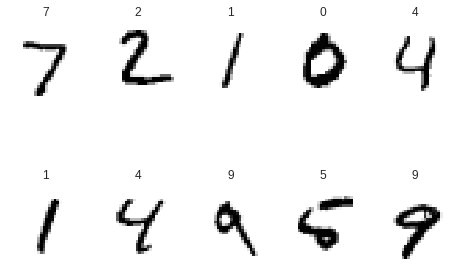

In [8]:
labels = sess.run(model, feed_dict={X: mnist.test.images, Y:mnist.test.labels})
print(labels)
fig = plt.figure()

for i in range(10):
    # 2행 5열의 그래프를 만들고, i + 1번째에 숫자 이미지를 출력합니다.
    subplot = fig.add_subplot(2, 5, i + 1)
    # 이미지를 깨끗하게 출력하기 위해 x와 y눈금을 출력하지 않습니다.
    subplot.set_xticks([])
    subplot.set_yticks([])
    # 출력한 이미지 위에 예측한 숫자를 출력합니다.
    # np.argmax는 tf.argmax와 같은 기능의 함수입니다.
    # 결과값인 labels의 i번째 요소가 원-핫 인코딩 형식으로 되어 있으므로,
    # 해당 배열에서 가장 높은 값을 가진 인덱스를 예측한 숫자로 출력합니다.
    subplot.set_title('%d' % np.argmax(labels[i]))
    # 1차원 배열로 되어 있는 i번째 이미지 데이터를
    # 28x28 형식의 2차원 배열로 변형하여 이미지 형태로 출력합니다.
    # cmap 파라미터를 통해 이미지를 그레이스케일로 출력합니다.
    subplot.imshow(mnist.test.images[i].reshape((28, 28)), cmap=plt.cm.gray_r)
    
plt.show()